#### Agenda
* What is drawback of using train_test_split
* How does K-fold Cross_validation overcome this limitation?
* How can cross_validation be used for selecting tuning paremeers
* what are some possible improvements to cross_validation

Comparing cross_validatin to train_test_split
* Advantages of Cross_validation:
 * More accurate estimate of out-of-sample accuracy
 * More 'efficient' use of data(every observation is used for both training and testing)
* Advantages of train_test_split:
 * Runs faster
 * Simpler to examine the detailed resutls of the testing process

In [8]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [9]:

iris=load_iris()
X=iris.data
y=iris.target

In [10]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=100)
knn=KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_pred=knn.predict(X_test)
metrics.accuracy_score(y_test,y_pred)

0.9736842105263158

#### the essense of cross_validatin:
we create a bunch of train_test_splits, calculate the testing accuracy
for each and average the results together.

In [11]:
from sklearn.model_selection import cross_val_score

In [12]:
knn=KNeighborsClassifier(n_neighbors=5)
scores=cross_val_score(knn,X,y,cv=10,scoring='accuracy')
scores

array([1.        , 0.93333333, 1.        , 1.        , 0.86666667,
       0.93333333, 0.93333333, 1.        , 1.        , 1.        ])

In [13]:
scores.mean()

0.9666666666666668

#### Find the best value of K


Text(0, 0.5, 'accuracy score')

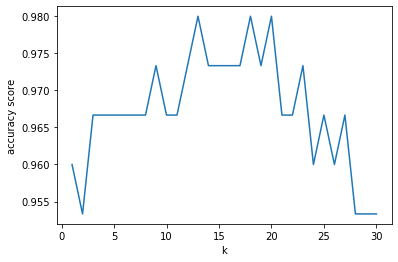

In [14]:
scores=[]
k_range=range(1,31)
for k in k_range:
    knn=KNeighborsClassifier(n_neighbors=k)
    score=cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()
    scores.append(score)

import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(k_range,scores)
plt.xlabel('k')
plt.ylabel('accuracy score')



#### Hilgher values of K produce less complex models, thus we choose 20

#### Cross_Validation example: Model selection

In [16]:
knn=KNeighborsClassifier(n_neighbors=20)
cross_val_score(knn,X,y,cv=10,scoring='accuracy').mean()# we run mean method directly on the score

0.9800000000000001

In [17]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(max_iter=200)
cross_val_score(logreg,X,y,cv=10,scoring='accuracy').mean()

0.9733333333333334

#### KNN is a better choice than Logistic Regression for this particular task

#### Cross_validation for feature selection


In [18]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

In [19]:
data=pd.read_csv('https://raw.githubusercontent.com/justmarkham/scikit-learn-videos/master/data/Advertising.csv',index_col=0)

In [20]:
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


Select all features (TV,Radio,Nespaper)

In [31]:
X=data[['TV','Radio','Newspaper']]
y=data['Sales']

In [32]:
linreg=LinearRegression()
scores=cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')

In [33]:
scores
rmse=np.sqrt(-scores).mean()
rmse

1.6913531708051792

In [34]:
X=data[['TV','Radio']]
y=data['Sales']

In [38]:
linreg=LinearRegression()
scores=cross_val_score(linreg,X,y,cv=10,scoring='neg_mean_squared_error')


In [39]:
rmse=np.sqrt(-scores).mean()
rmse

1.6796748419090766

From the Cross_validation Feature selection sample, we can conclude that 
adding the variable Newpaper returns higher rmse score. Thus, we should keep that variable in our model.

source:https://www.youtube.com/watch?v=6dbrR-WymjI&list=PL5-da3qGB5ICeMbQuqbbCOQWcS6OYBr5A&index=7